In [1]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import os

## Loagind the class module

In [2]:
%run ../stochastic_fractal_m.py

### User can change these values

In [10]:
alphap = 3
probp = 0.75

total_iterationp = 1000*1000
min_iterationp  = 1000*100
iteration_stepp = 1000 * 50

ensemble_sizep = 10000


# slope = 0.78835


In [11]:
expon = 2 * alphap - 1

## Directory

In [12]:
dir_data = "../data/alpha{}/".format(alphap)
dir_fig = "../figures/alpha{}/".format(alphap)

##for testing
dir_data = "../data/temp/alpha{}/".format(alphap)
dir_fig = "../figures/temp/alpha{}/".format(alphap)


for dir_name in [dir_data, dir_fig]:
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)
        print("directory created")
        pass
    else:
        print("directory exists")
        pass


filename_out_data = dir_data+"Mdf_alpha_{}_p_0_{:2}".format(alphap, int(probp*100))
filename_figure = dir_fig+"conservation_alpha_{}.pdf".format(alphap)
print(filename_out_data)

directory exists
directory exists
../data/temp/alpha3/Mdf_alpha_3_p_0_75


## Simulation

In [13]:
sf_moment = Moment(alpha=alphap, probability=probp)
sf_moment.log(True)
Mdf_list = sf_moment.run_ensemble(ensemble_sizep, total_iterationp, min_iterationp, iteration_stepp)
Mdf_avg = np.average(Mdf_list)

kwargs  {'alpha': 3, 'probability': 0.75}
Key 'fractal_dim' or 'exponent' not found!
Theoretical value is used. df =  0.788345
realization  20  . Time spent  2.0140480995178223  sec
realization  40  . Time spent  2.046877861022949  sec
realization  60  . Time spent  2.034640312194824  sec
realization  80  . Time spent  2.051703453063965  sec
realization  100  . Time spent  2.160365581512451  sec
realization  120  . Time spent  2.071040630340576  sec
realization  140  . Time spent  2.0599024295806885  sec
realization  160  . Time spent  2.151611089706421  sec
realization  180  . Time spent  2.0923242568969727  sec
realization  200  . Time spent  2.170978546142578  sec
realization  220  . Time spent  2.1196181774139404  sec
realization  240  . Time spent  2.0469624996185303  sec
realization  260  . Time spent  2.031740188598633  sec
realization  280  . Time spent  2.05997896194458  sec
realization  300  . Time spent  2.0358340740203857  sec
realization  320  . Time spent  2.0163342952728

In [14]:
time_list = np.arange(min_iterationp, total_iterationp+1, iteration_stepp)
print(time_list.shape)
print(Mdf_list.shape)

(19,)
(19,)


In [15]:
import json

header = dict()
header['alpha'] = alphap
header['probability'] = probp
header['ensemble_size'] = ensemble_sizep
header['total_iteraion'] = total_iterationp
header['Mdf_avg']= "{:6f}".format(Mdf_avg)
header['cols'] = ["t", "M_df"]

header_str = json.dumps(header)
print(header_str)

# np.savetxt(filename_out_data, np.c_[time_list, Mdf_list], header=header_str)

{"alpha": 3, "probability": 0.75, "ensemble_size": 2000, "total_iteraion": 100000, "Mdf_avg": "1.013520", "cols": ["t", "M_df"]}


../figures/temp/alpha3/conservation_alpha_3.pdf


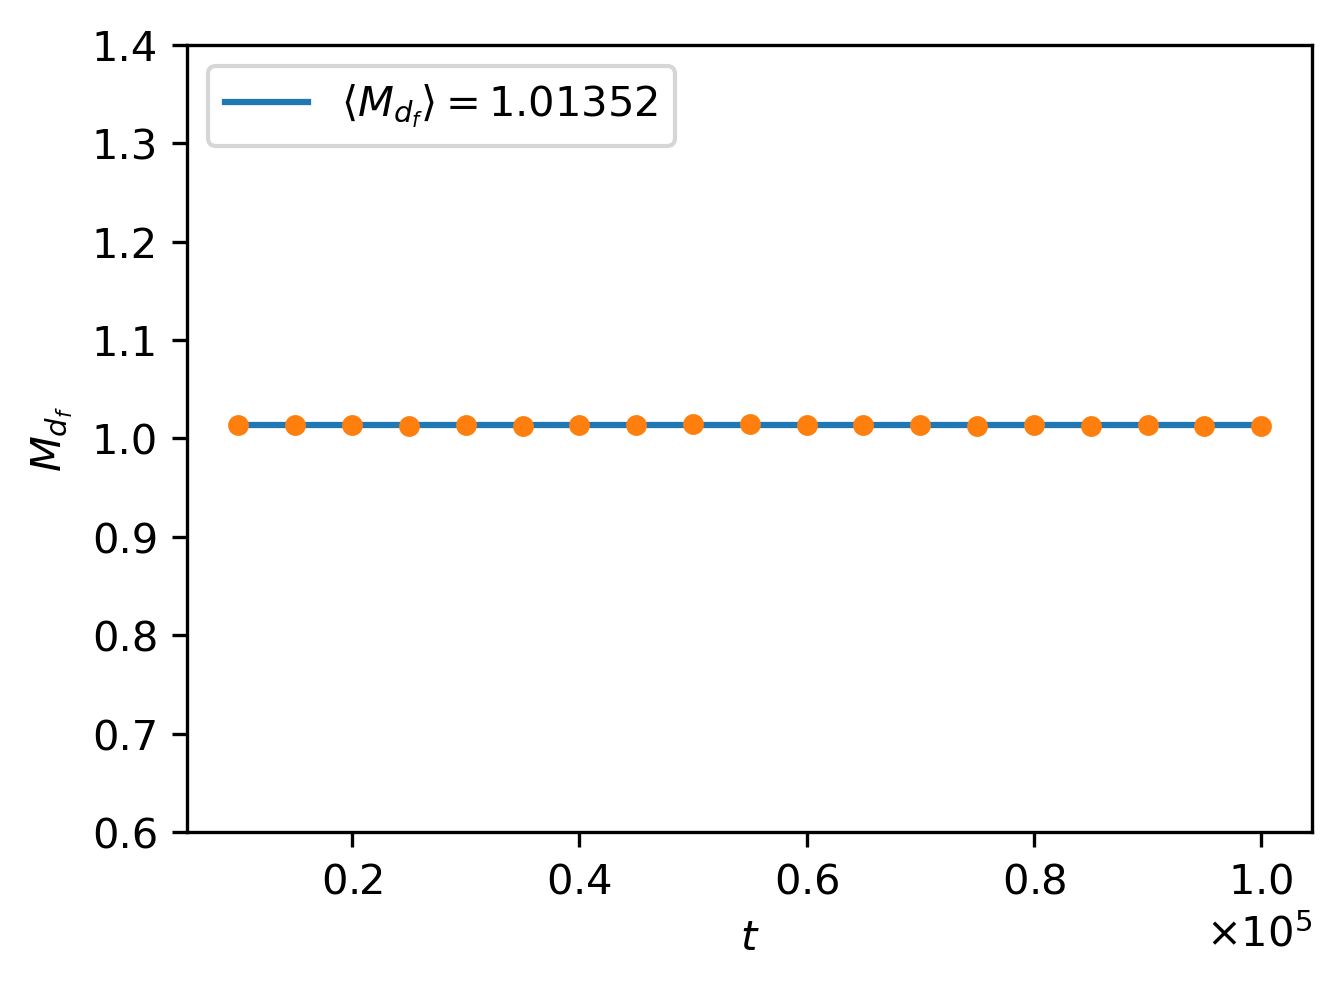

In [17]:
from matplotlib import ticker

fig, axes = plt.subplots(1,1,figsize = (5,3.5),dpi = 300)
plt.plot(time_list, 0*time_list+Mdf_avg, label=r"$\langle M_{d_f}\rangle=$"+"{:.5f}".format(Mdf_avg), color='tab:blue')
plt.plot(time_list, Mdf_list, "o", color='tab:orange', markersize=4)
plt.legend(loc=2)
plt.xlabel(r"$t$")
plt.ylabel(r"$M_{d_f}$")
plt.ylim([0.6, 1.4])
axes.set_position([0.15,0.15,0.75,0.75])

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
axes.xaxis.set_major_formatter(formatter) 

print(filename_figure)
# plt.savefig(filename_figure)